<a href="https://colab.research.google.com/github/A01793509/Equipo_44/blob/main/Avance1_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import numpy as np
import warnings

---
##👣**Obtener Datos**: Cargamos el archivo CSV con la información del consumo del casino desde enero del 2021 hasta marzo del 2024.
---

In [2]:
dfCasinoConsumo = pd.read_csv("DatosConsumoCasino.csv",sep=";")
dfCasinoConsumo.head()
dfCasinoConsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884615 entries, 0 to 884614
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Consecutivo             884615 non-null  int64  
 1   IdProducto              836829 non-null  float64
 2   cod lector              884615 non-null  int64  
 3   Cod comedor             884615 non-null  int64  
 4   Identificacion persona  884615 non-null  int64  
 5   Fecha Consumo           884615 non-null  object 
 6   Detalle                 884615 non-null  object 
 7   Nro empleados           884615 non-null  int64  
 8   Tipo Empleado           884615 non-null  object 
 9   Nivel                   884615 non-null  object 
 10  Porcentaje apoyo        884615 non-null  int64  
 11  Invitado                884615 non-null  int64  
 12  Ing x planta            884615 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 87.7+ MB


In [ ]:
print("**********************************************")
print(f"Se encontraron {len(dfCasinoConsumo):,.2f} registros:")
print("**********************************************")

**********************************************
Se encontraron 884,615.00 registros:
**********************************************


---
###☝ Antes de iniciar con la limpieza, validamos la relevancia de cada columna para el modelo, clasificándola de acuerdo al tipo de dato y decidiendo la acción que realizaremos con estas en el dataframe. A continuación mostramos el análisis preliminar que hicimos para nuestros datos:
---


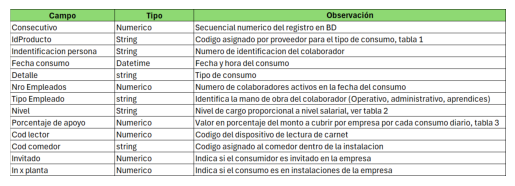

In [ ]:
img = mpimg.imread('DiccionarioDatos.png')
plt.imshow(img)
plt.axis('off')
plt.show()

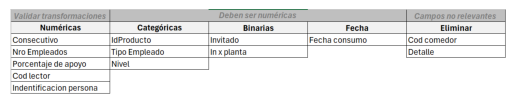

In [ ]:
img = mpimg.imread('AjusteDatos.png')
plt.imshow(img)
plt.axis('off')
plt.show()

---
##👣**Análisis exploratorio de datos:** Realizaremos análisis de las columnas existentes y validación de datos perdidos contestando las siguientes preguntas:
- ¿Hay valores faltantes en el conjunto de datos?
- ¿Se pueden identificar patrones de ausencia?
- ¿Cuáles son las estadísticas resumidas del conjunto de datos?
- ¿Hay valores atípicos en el conjunto de datos?
- ¿Cuál es la cardinalidad de las variables categóricas?
- ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
- ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
- ¿Hay correlación entre las variables dependientes e independientes?
- ¿Cómo se distribuyen los datos en función de diferentes categorías?
- ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
- ¿Hay desequilibrio en las clases de la variable objetivo?
---

---
<center> 🤔¿Hay valores faltantes en el conjunto de datos?</center>

---

In [ ]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos?")
if (dfCasinoConsumo.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos?
Sí


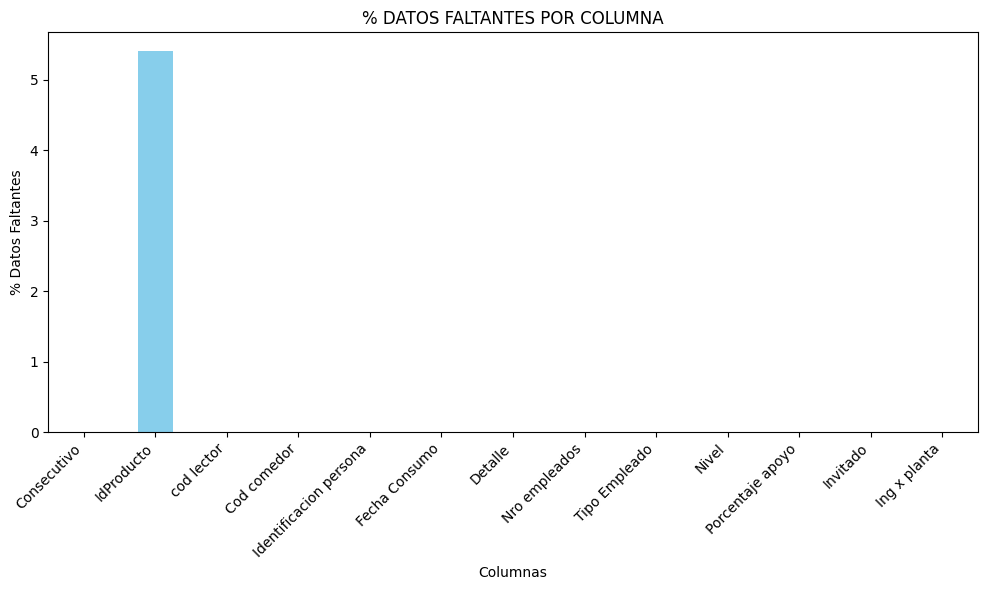

In [ ]:
#Graficamos el porcentaje de datos faltantes por cada columna del conjunto
columnas_valor_faltante = dfCasinoConsumo.isnull().mean() * 100

plt.figure(figsize=(10, 6))
columnas_valor_faltante.plot(kind='bar', color='skyblue')
plt.title('% DATOS FALTANTES POR COLUMNA')
plt.xlabel('Columnas')
plt.ylabel('% Datos Faltantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
<center> 🤔¿Se pueden identificar patrones de ausencia?</center>

---

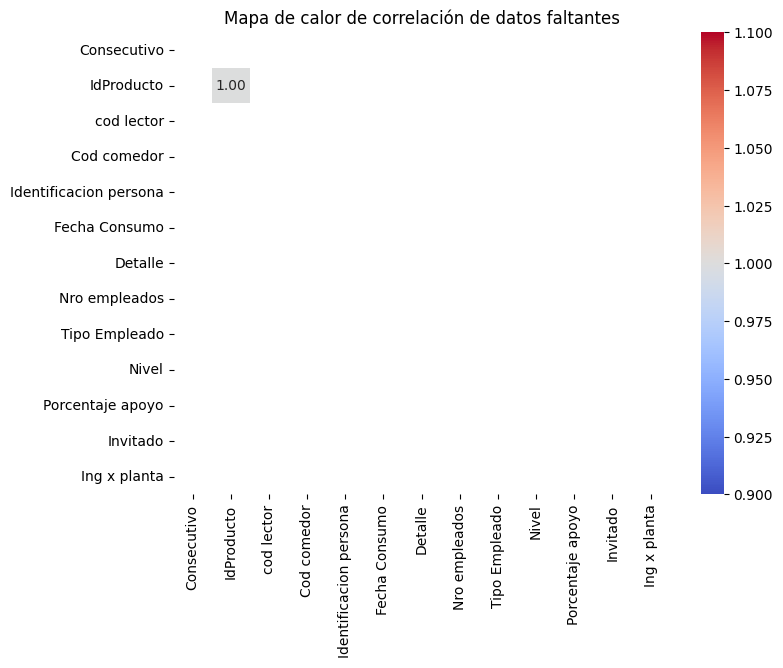

In [ ]:
#A continuación, validamos si existe algún patrón de ausencia en los datos

#Generamos la matriz de correlación de datos faltantes en el conjunto
Correlacion_Faltantes = dfCasinoConsumo.isnull().corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de calor de correlación de datos faltantes')
plt.show()

---
#####🔎 Observamos que la única columna con datos faltantes es "**IdProducto**" presentando aproxidamente un **5%** de datos perdidos, por lo cual, concluímos que no es relevante para la integridad de la información. Adicionalmente, no encontramos patrones de ausencia al intentar correlacionar los datos faltantes con otras columnas. Por otra parte, al realizar un análisis más profundo a la información, encontramos que el campo "IdProducto" es una codificación que cada proveedor le asocia al tipo de consumo, valor que se categoriza en el campo "**Detalle**". En ese orden de ideas, podríamos eliminar la columna "IdProducto" para trabajar con la columna "Detalle".
---

---
<center> 🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>

---

In [ ]:
#Seleccionamos solo las columnas numéricas de nuestro conjunto de datos
Columnas_Numericas = dfCasinoConsumo.select_dtypes(include='number')

#Ejecutamos el resumen estadístico para las columnas numéricas seleccionadas
Columnas_Numericas.describe()

,Identificacion persona,Nro empleados,Porcentaje apoyo,Invitado,Ing x planta
count,884615.000000,884615.000000,884615.000000,884615.0,884615.0
mean,101249.758539,3871.545797,61.330398,0.0,1.0
std,1039.239901,174.444601,40.545332,0.0,0.0
min,100001.000000,3410.000000,0.000000,0.0,1.0
25%,100410.000000,3820.000000,0.000000,0.0,1.0
50%,100905.000000,3875.000000,90.000000,0.0,1.0
75%,101953.000000,3968.000000,90.000000,0.0,1.0
max,104417.000000,4204.000000,100.000000,0.0,1.0


---
#####🔎 Los datos se encuentran distribuidos de manera diversa, algunos campos numéricos presentan una distribución más amplia y otros se encunetran más cercanos a ciertos valores. Adicionalmente, la dispersión de los datos varía para cada uno de los campos, encontrando algunos con una dispersión más amplia que otros. Por ejemplo; el campo **Porcentaje apoyo** presenta una dispersión mucho más amplia debido a la variabilidad en los datos que pueden ir de 0 (min) a 100 (max). Adicionalmente, el campo **Invitado** presenta un valor único de 0 y el campo **Ing x planta** presenta valores binarios, por lo cual, no percibimos información clara sobre su distribución o dispersión.
---

**ERICK**
---
<center> 🤔¿Hay valores atípicos en el conjunto de datos?</center>
<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?</center>


<center>Variables Númericas</center>

In [3]:
def create_grid_of_plots(df, columns,  figsize=(15, 5), bins=None):
  full_rows = math.floor(len(Cols_Num)/3)
  last_row_elems = len(Cols_Num) % 3
  for i in range(0,full_rows*3,3):
    pltcols = Cols_Num[i:i+3]
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=figsize, gridspec_kw={"height_ratios": (0.25, 0.75)})
    fig.subplots_adjust(hspace=0.18)
    for j in range(3):
      col = pltcols[j]
      ax = axes[0, j%3]
      ax2 = axes[1, j%3]
      feature = df[col]
      multi_histogram_boxplot(feature, ax, ax2, bins)
      ax.set_title(col).set_position([0.5, -3])
    plt.show()
  if (last_row_elems > 0):
    pltcols = Cols_Num[len(Cols_Num)-last_row_elems:]
    if len(pltcols) == 1:
      single_histogram_boxplot(df,pltcols[0])
    else:
      fig, axes = plt.subplots(nrows = 2, ncols = len(pltcols), figsize = (len(pltcols)*5, 5), gridspec_kw={"height_ratios": (0.25, 0.75)})
      print(axes)
      fig.subplots_adjust(hspace=0.15)
      for j in range(len(pltcols)):
        col = pltcols[j]
        ax = axes[0, j%len(pltcols)]
        ax2 = axes[1, j%len(pltcols)]
        feature = df[col]
        multi_histogram_boxplot(feature, ax, ax2, bins)
        ax.set_title(col).set_position([0.5, -3])
      plt.show()


def multi_histogram_boxplot(feature, ax, ax2, bins=None):
    sns.boxplot(feature, ax=ax, showmeans=True, color='violet', orient="h")
    if bins:
        sns.distplot(feature, kde=False, ax=ax2, bins=bins, color='tab:cyan')
    else:
        sns.distplot(feature, kde=False, ax=ax2, color='tab:cyan')
    ax2.set_xlabel('')
    ax2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax2.axvline(np.median(feature), color='blue', linestyle='-')


def single_histogram_boxplot(df,col, figsize=(5,5), bins = None):
    feature = df[col]
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    ax_box2.set_title(col).set_position([0.5, -3])
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient="h") # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

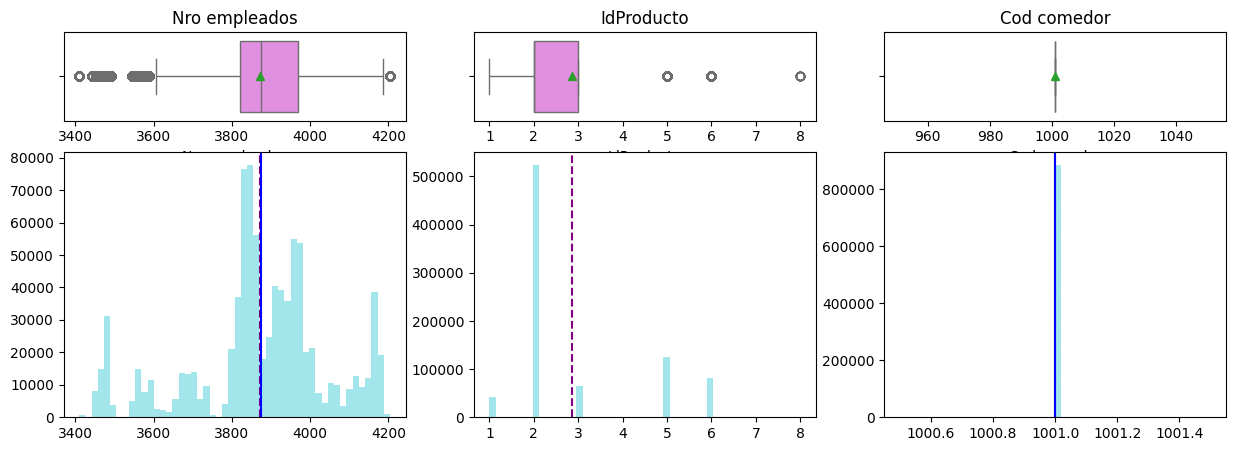

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


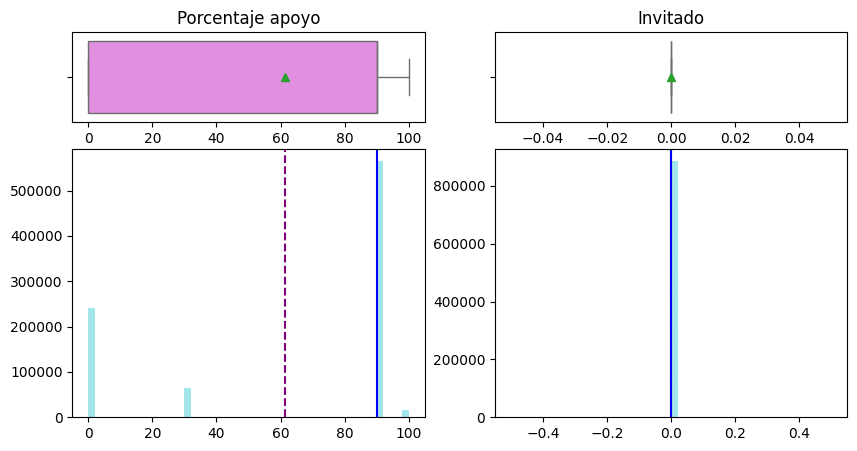

In [4]:
warnings.filterwarnings("ignore")
Cols_Num = ["Nro empleados", "IdProducto", "Cod comedor", "Porcentaje apoyo", "Invitado"]
create_grid_of_plots(dfCasinoConsumo, Cols_Num)

🔎 Para las variables numericas pordemos obsevar los siguiente:


*   La cantidad de empleados mantiene una media entre los 3800 a los 4000 empleados, vemos algunos outliers por encima de 4000 y por debajo de 3400, pero corresponden a fuerza laboral activa en la fecha. por lo tanto son puntos clave dentro del modelo. De igual forma se muestra la distribucion con estos outliers, no se ve sesgo alguno para esta caracteristica.
*   Para la característica Idproducto se puede observar que se mantiene ente los tipos de producto 2, que corresponde al de mayor consumo (almuerzo), como outliers se presentan algunos consumos de otro tipo, para nuestro ejercicio no se tomaran en cuenta ya que no están dentro de nuestra variable a predecir. Se presenta un sesgo hacia la izquierda, no será necesario aplicar alguna transformación no lineal debido a que al tomar solo el tipo de servicio almuerzo la distribución quedara normal.

* Para las características cod Comedor e Invitado observamos que se mantiene un solo valor, lo que indica que es una distribución uniforme sin outliers.

* Para la característica porcentaje de apoyo se observa una distribución de acuerdo con los porcentajes ofrecidos de auxilio, estos muestran un mayor porcentaje para el valor 90%, seguido 0% (sin apoyo) y 30%. se observa una pequeño numero para el apoyo del 100%, lo que corresponde a los practicantes, los cuales solo ellos tienen el beneficio del auxilio completo. No se aprecian outliers.

---
<center> 🤔¿Cuál es la cardinalidad de las variables categóricas?</center>

---

In [5]:
#Cargamos solo las columnas categóricas
Columnas_Dategoricas = dfCasinoConsumo.select_dtypes(include='object')

#Calculamos la cardinalidad de las columnas categóricas
Cardinalidad_Categoricas = Columnas_Dategoricas.nunique()

print("**********************************************************************************************")
print("A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:")
print("**********************************************************************************************")
Cardinalidad_Categoricas

**********************************************************************************************
A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:
**********************************************************************************************


Fecha Consumo    1181
Detalle             9
Tipo Empleado       3
Nivel              12
dtype: int64

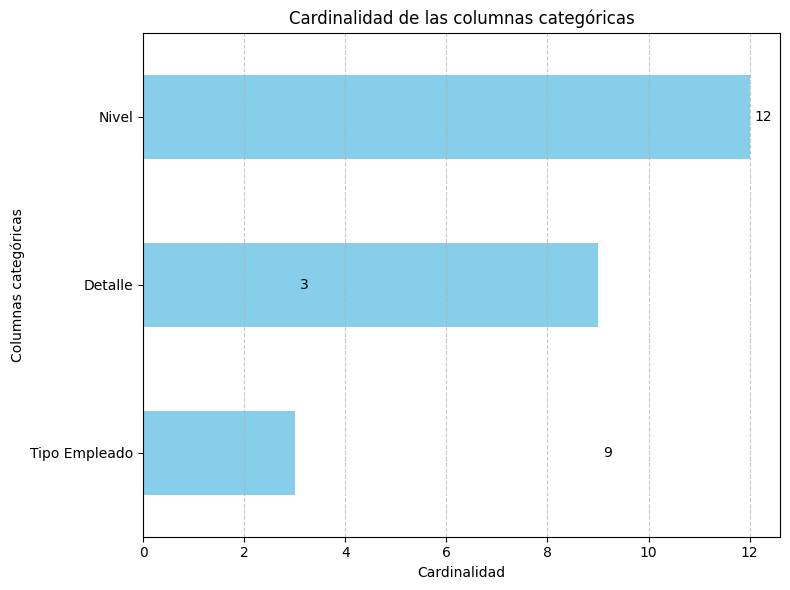

In [ ]:
#Graficamos la cardinalidad de las columnas categóricas
plt.figure(figsize=(8, 6))
barplot = Cardinalidad_Categoricas.sort_values().plot(kind='barh', color='skyblue')
plt.title('Cardinalidad de las columnas categóricas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas categóricas')
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Colocamos los valores únicos en cada barra
for i, v in enumerate(Cardinalidad_Categoricas):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

---
#####🔎 Encontramos 9 valores únicos en la columna categórica **Detalle**, 3 tipos diferentes de empleados en la columna **Tipo Empleado** y 12 categorías en la columna **Nivel**. Esto nos permitirá comprender la estructura y la naturaleza de los datos en el conjunto.
---

**ERICK**

---
<center> 🤔¿Hay valores atípicos en el conjunto de datos?</center>
<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?<center>

<center>
Variables Catégoricas
</center>

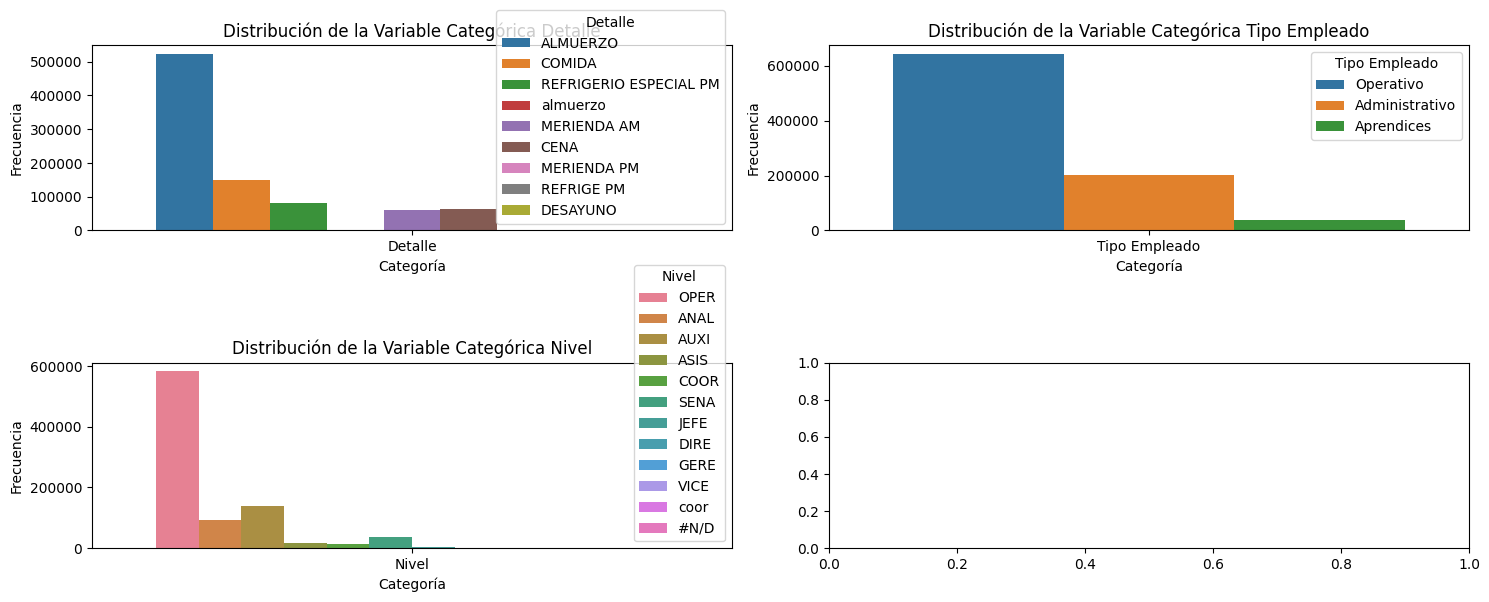

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

# Graficar el primer subplot para la primera columna
sns.countplot(data=pd.melt(dfCasinoConsumo[['Detalle']]), x='variable', hue='value', ax=axes[0, 0])
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de la Variable Categórica Detalle')
axes[0, 0].legend(title='Detalle')

# Graficar el segundo subplot para la segunda columna
sns.countplot(data=pd.melt(dfCasinoConsumo[['Tipo Empleado']]), x='variable', hue='value', ax=axes[0, 1])
axes[0, 1].set_xlabel('Categoría')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de la Variable Categórica Tipo Empleado')
axes[0, 1].legend(title='Tipo Empleado')

# Graficar el segundo subplot para la tercera columna
sns.countplot(data=pd.melt(dfCasinoConsumo[['Nivel']]), x='variable', hue='value', ax=axes[1, 0])
axes[1, 0].set_xlabel('Categoría')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de la Variable Categórica Nivel')
axes[1, 0].legend(title='Nivel')

plt.tight_layout()
plt.show()

🔎 Para las variables categóricas podemos observar que no se presentan outliers, puesto que los valores están en las categorías definidas para cada uno, podemos apreciar que, si existe un sesgo hacia la izquierda para las variables Tipo Empleado con el valor **“Operativo”** y Nivel con el valor **“OPER”**, puesto que presentan la mayor la presencia en el número de ocurrencias en el tipo de Servicio almuerzo de la variable Detalle. Por lo tanto, asumimos que para estas variables estos valores serán valiosos dentro del modelo a proponer por la alta correlación que presentan.

**ERICK**
---
<center> 🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>

---

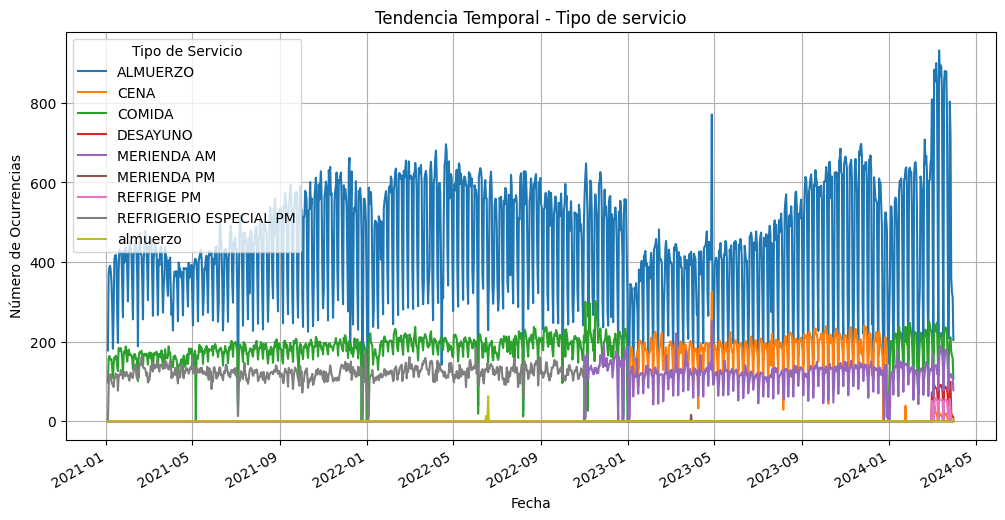

In [8]:
# Convertir la columna 'fecha' a tipo datetime si no está en ese formato
dfCasinoConsumo['Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Fecha Consumo'])

# Contar el número de ocurrencias de cada tipo de evento por fecha
ocurrencias_por_fecha = dfCasinoConsumo.groupby(['Fecha Consumo', 'Detalle']).size().unstack(fill_value=0)

# Graficar
plt.figure(figsize=(12, 6))
ocurrencias_por_fecha.plot(ax=plt.gca())
plt.xlabel('Fecha')
plt.ylabel('Número de Ocurrencias')
plt.title('Tendencia Temporal - Tipo de servicio')
plt.legend(title='Tipo de Servicio')
plt.grid(True)
plt.show()

🔎 Podemos observar una tendencia temporal en los datos resultado del número de servicios ofrecidos de forma diaria a través de 3 años. Se alcanza a apreciar **estacionalidad** así: al comienzo de cada año los servicios arrojan valores por debajo de los 200 consumos diarios (contemplando solo el servicio tipo almuerzo que es nuestra salida a predecir) y aumentando con el pasar de los meses y luego vuelven a decrecer al final de año, la variación de la cantidad se mantiene en su mayoría entre los 250 y 650 servicios diarios. Se aprecia el mismo comportamiento para los años 2022 y 2023. Se pueden apreciar algunos valores atípicos en el periodo mayo 2023 y mayo 2024 que pueden corresponder a eventos especiales.

**CARLOS**
---
<center> 🤔¿Hay correlación entre las variables dependientes e independientes?</center>

---

In [ ]:
# Preparación de los datos:
# Se creo la columna 'Solo Fecha Consumo' basado en la columna 'Fecha Consumo' en el archivo csv, con el fin de almacenar la fecha sin horas
# 'Solo Fecha Consumo' se conviete a datetime para extraer el 'Dia de la semana'
dfCasinoConsumo['Solo Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Solo Fecha Consumo'], format='%d/%m/%Y', errors='coerce')
dfCasinoConsumo['Dia de la semana'] = dfCasinoConsumo['Solo Fecha Consumo'].dt.dayofweek # lunes=0, domingo=6

# print(dfCasinoConsumo['Dia de la semana'].value_counts().sort_index())#Cantidad total de almuerzos consumidos por día de la semana
# print("Total almuerzos: ",sum(dfCasinoConsumo['Dia de la semana'].value_counts().sort_index()))#Cantidad total de almuerzos consumidos en todas las vigencias

In [ ]:
# Se convierte la variable 'Tipo Empleado' de variable categórica a variable numérica
dfCasinoConsumo['Tipo Empleado'] = pd.Categorical(dfCasinoConsumo['Tipo Empleado']).codes

# print("Valores únicos:", dfCasinoConsumo['Tipo Empleado'].unique())
# print("Cantidad de valores únicos:", dfCasinoConsumo['Tipo Empleado'].nunique())
# print("Sumatoria por valores únicos:")
# print(dfCasinoConsumo['Tipo Empleado'].value_counts())

# Nos aseguramos que 'Nro empleados' y 'Porcentaje apoyo' sean variables numéricas
dfCasinoConsumo['Nro empleados'] = pd.to_numeric(dfCasinoConsumo['Nro empleados'], errors='coerce')
dfCasinoConsumo['Porcentaje apoyo'] = pd.to_numeric(dfCasinoConsumo['Porcentaje apoyo'], errors='coerce')

In [ ]:
# Filtrar el DataFrame para conservar solo las filas donde 'Detalle' es 'ALMUERZO' y crear una copia para evitar SettingWithCopyWarning
dfCasinoConsumo = dfCasinoConsumo[dfCasinoConsumo['Detalle'] == 'ALMUERZO'].copy()

# Creamos una columna auxiliar 'Conteo Almuerzos' con todos los valores iguales a 1 para facilitar la suma
dfCasinoConsumo.loc[:, 'Conteo Almuerzos'] = 1

# Luego, agrupamos los datos por 'Día de la semana' y sumamos el 'Conteo Almuerzos' para obtener el 'Número de Almuerzos' total por cada día de la semana
dfCasinoConsumo['Número de Almuerzos'] = dfCasinoConsumo.groupby('Dia de la semana')['Conteo Almuerzos'].transform('sum')

# Código para visualizar datos
# Verificar la columna 'Número de Almuerzos'
# print("Primeras filas de la columna 'Número de Almuerzos':")
# print(dfCasinoConsumo['Número de Almuerzos'].head(7))

# Mostrar estadísticas descriptivas de la columna
# print("\nEstadísticas descriptivas de 'Número de Almuerzos':")
# print(dfCasinoConsumo['Número de Almuerzos'].describe())

# Verificar la distribución de 'Número de Almuerzos' por 'Día de la semana'
# print("\nDistribución de 'Número de Almuerzos' por 'Día de la semana':")
# print(dfCasinoConsumo.groupby('Dia de la semana')['Número de Almuerzos'].unique())
# print("Total almuerzos: ", sum(dfCasinoConsumo['Número de Almuerzos'].value_counts().sort_index()))

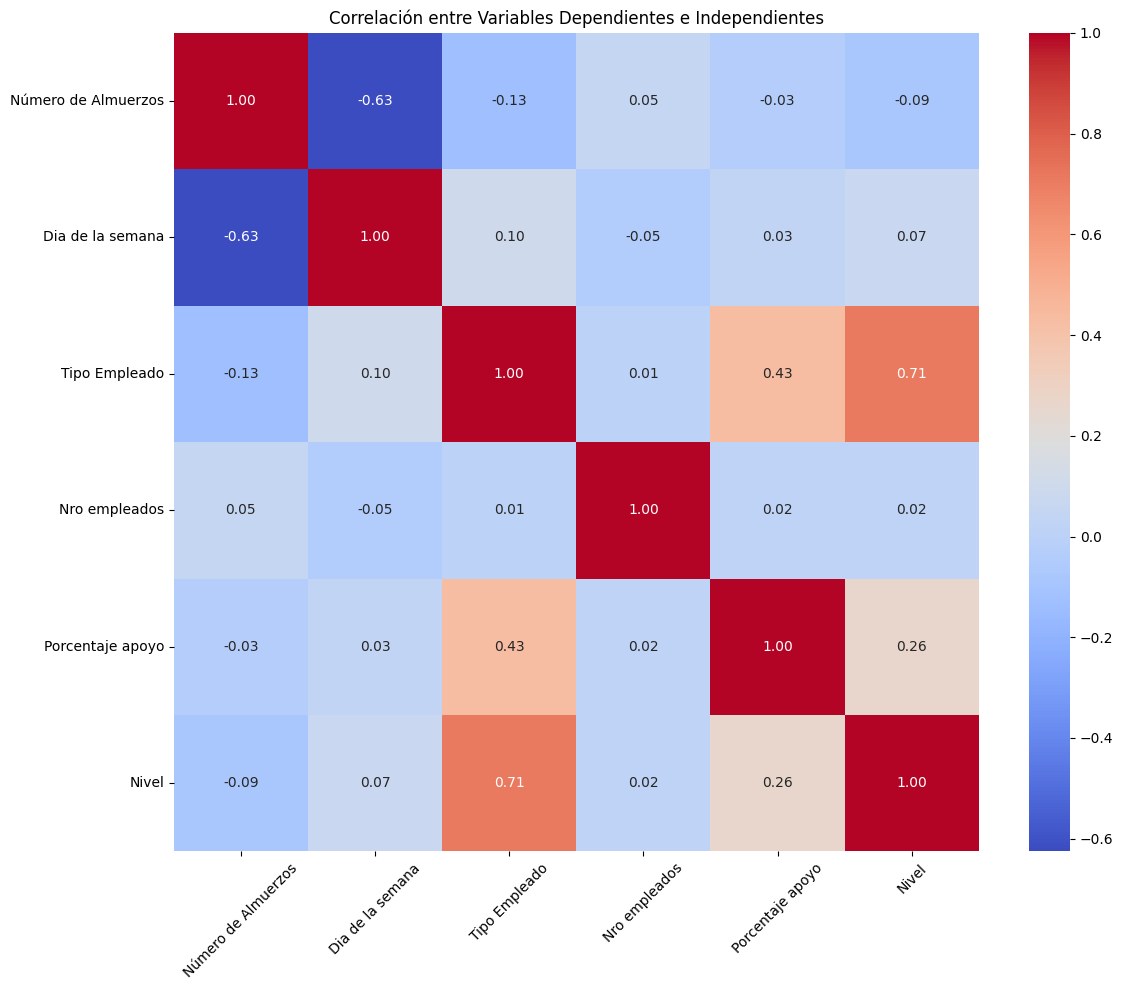

In [ ]:
# Preparación de los datos:
dfCasinoConsumo['Tipo Empleado'] = pd.Categorical(dfCasinoConsumo['Tipo Empleado']).codes # Convertir 'Tipo Empleado' en variable numérica
dfCasinoConsumo['Detalle'] = pd.Categorical(dfCasinoConsumo['Detalle']).codes  # Convertir 'Detalle' en variable numérica, se dejo solo ALMUERZO
dfCasinoConsumo['Nivel'] = pd.Categorical(dfCasinoConsumo['Nivel']).codes      # Convertir 'Nivel' en variable numérica
dfCasinoConsumo['Nro empleados'] = pd.to_numeric(dfCasinoConsumo['Nro empleados'], errors='coerce')
dfCasinoConsumo['Porcentaje apoyo'] = pd.to_numeric(dfCasinoConsumo['Porcentaje apoyo'], errors='coerce')

# Cada registro en el dataframe representa un ALMUERZO, CENA, O COMIDA consumida
dfCasinoConsumo['Número de Almuerzos'] = dfCasinoConsumo.groupby('Dia de la semana')['Dia de la semana'].transform('count')

# Eliminamos las filas con valores NaN en las columnas relevantes para asegurarnos de que la correlación no se vea afectada por los datos faltantes.
dfCasinoConsumo.dropna(subset=['Número de Almuerzos', 'Dia de la semana', 'Tipo Empleado', 'Nro empleados', 'Porcentaje apoyo', 'Nivel'], inplace=True)

# Finalmente se crea la Matriz de Correlación entre las variables seleccionadas, se quita la variable Detalle
correlation_matrix = dfCasinoConsumo[['Número de Almuerzos', 'Dia de la semana', 'Tipo Empleado', 'Nro empleados', 'Porcentaje apoyo', 'Nivel']].corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Dependientes e Independientes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---
#####🔎 Algunas de las conclusiones obtenidas para calcular la corrrelación entre las variables dependientes e independientes:
*   Las variables **"Invitado"** y **"Ing x planta"** no presentaban variación, dado que todos sus  valores era 0 y 1, entonces no fueron consideradas para calcular la matriz de correlación.
*   La correlación entre Número de Almuerzos y Día de la Semana (-0.63):
Esta correlación es **fuertemente negativa**, lo que confirma una tendencia de que a medida que avanza la semana, el número de almuerzos consumidos disminuye. Esto puede influir en la planificación de los almuerzos a contratar durante la semana.
*   La variable **Detalle** almacena el tipo de comida así: ALMUERZO, CENA, COMIDA, DESAYUNO, MERIENDA AM, MERIENDA PM, REFRIGE PM, REFRIGERIO ESPECIAL PM, y dado que se requiere obtener las cantidades correctas para el servicio de almuerzo del personal y así contribuir a que se reduzca considerablemente el  desperdicio de alimentos en la empresa, se opta por Filtrar el DataFrame para conservar solo las filas donde 'Detalle' es 'ALMUERZO'. De igual manera se observo en la correlación con todos los datos de **la variable Detalle no tenía una incidencia en la correlación, si no que sus valores fueron muy bajos**, por ello se procede a eliminarla de la correlación.
*   Existe una fuerte correlación positiva entre el Tipo de empleado y su Nivel jerárquico (0.71). Esto sugiere que las categorías de empleados están alineadas o son dependientes de los niveles jerárquicos dentro de la organización.
*    Hay una correlación moderada (0.43) entre el **Tipo Empleado** y el **Porcentaje apoyo** que reciben para los almuerzos. Esto puede indicar que diferentes tipos de empleados reciben diferentes niveles de subsidios para las comida, lo cual puede influir en su decisión de almorzar en el comedor de la empresa.
*   Las bajas correlaciones entre el número de empleados y las otras variables, indican que simplemente **más empleados activos en la fecha del consumo no garantiza un aumento o disminución proporcional en el uso del comedor**, lo que sugiere que otros factores contextuales o personales están en juego.
---

**CARLOS**
---
<center> 🤔¿Cómo se distribuyen los datos en función de diferentes categorías?</center>

---

**CARLOS**
---
<center> 🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>

---

---
<center> 🤔¿Hay desequilibrio en las clases de la variable objetivo?</center>

---

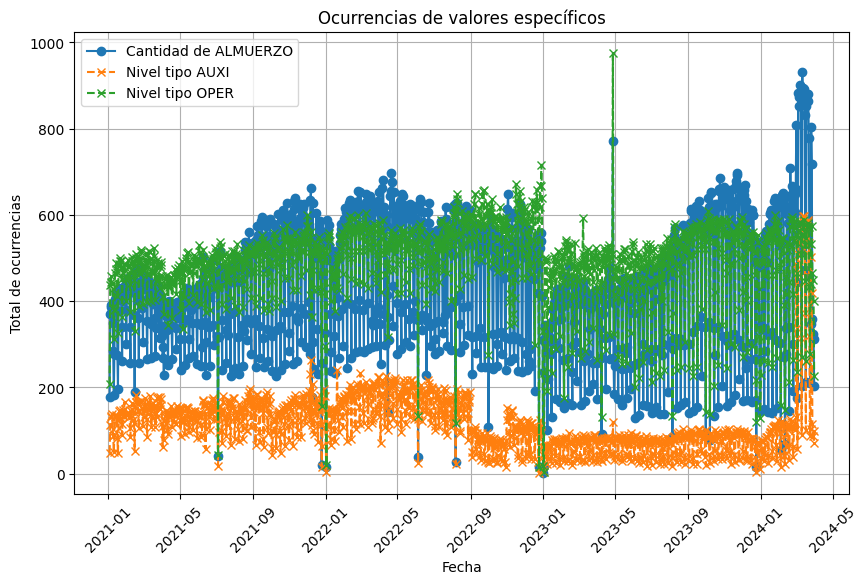

In [9]:
# Valores específicos para cada campo
valor_especifico_campo1 = 'ALMUERZO'
valor_especifico_campo2 = 'AUXI'
valor_especifico_campo3 = 'OPER'

# Filtrar el DataFrame para los valores específicos en cada campo
df_filtrado_campo1 = dfCasinoConsumo[dfCasinoConsumo['Detalle'] == valor_especifico_campo1]
df_filtrado_campo2 = dfCasinoConsumo[dfCasinoConsumo['Nivel'] == valor_especifico_campo2]
df_filtrado_campo3 = dfCasinoConsumo[dfCasinoConsumo['Nivel'] == valor_especifico_campo3]

# Contar ocurrencias de cada valor para cada campo
ocurrencias_campo1 = df_filtrado_campo1.groupby('Fecha Consumo').size()
ocurrencias_campo2 = df_filtrado_campo2.groupby('Fecha Consumo').size()
ocurrencias_campo3 = df_filtrado_campo3.groupby('Fecha Consumo').size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Graficar ocurrencias de campo1
plt.plot(ocurrencias_campo1.index, ocurrencias_campo1.values, marker='o', linestyle='-', label=f'Cantidad de {valor_especifico_campo1}')

# Graficar ocurrencias de campo2
plt.plot(ocurrencias_campo2.index, ocurrencias_campo2.values, marker='x', linestyle='--', label=f'Nivel tipo {valor_especifico_campo2}')

# Graficar ocurrencias de campo2
plt.plot(ocurrencias_campo3.index, ocurrencias_campo3.values, marker='x', linestyle='--', label=f'Nivel tipo {valor_especifico_campo3}')


# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Total de ocurrencias')
plt.title(f'Ocurrencias de valores específicos')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

🔎 Como nuestra variable objetivo es una predicción numérica, hablar de desequilibrio solamente para los valores de esta no aplicaría, pero, tomando esta variable en función de otras podemos ver que, si existe cierto desequilibrio o sesgo hacia algunas de ellas, tal es el caso de comparar el número de consumos totales de la variable tipo de servicio **“Almuerzo”** con el Nivel **“OPER”** o el tipo de empleado **“Operativo”**. Podemos ver que manejan proporciones similares en comparación con los otros valores para estas mismas variables, por ejemplo Nivel **"AUXI"**, lo que nos lleva a concluir que si existe un desequilibrio en función de estos valores específicos.

---
## ⛔**NOTA**: Debemos validar si dejamos el siguiente código o lo eliminamos. Esto hace parte del análisis que Alberto hizo dentro de la exploración inicial de los datos.
---

---
#####☝ A continuación vamos a obtener los valores no numéricos para aquellas columnas que según el diccionario deberían ser numéricas, tal como se identificó en el diccionario de datos mostrado al comienzo, una vez identificados estos valores no numéricos realizaremos su reemplazo antes de proceder con el cambio del tipo de dato en las columnas categóricas.
---

In [ ]:
#Creamos el dataframe "dfnum" solo con las columnas numéricas del conjunto de datos original.
ColumnasNumericas=['Identificacion persona', 'Nro empleados', 'Porcentaje apoyo', 'Invitado', 'Ing x planta']
dfnum = dfCasinoConsumo[ColumnasNumericas]
#Creamos una lista para almacenar todos los valores no numéricos que encontramos en las columnas numéricas
list_nn = list()
for col in range(len(dfnum)):
  for fil in dfnum.iloc[col]:
    tem=str(fil)
    if (tem.isnumeric()==False):
      #Asignamos el valor no numérico encontrado a la lista.
      list_nn.append(fil)

#Convertimos todos los valores de la lista a 'str'
list_nn_final=list(map(str,list_nn))
#Ordenamos la lista en forma descendente para obtener aquellos valores con caracteres no numéricos
list_nn_final.sort(reverse=True)
if(len(list_nn_final)>0):
  print("********************************************************************************************************")
  print("Las siguientes son ocurrencias por valor no numérico encontradas en columnas que deberían ser numéricas:")
  print("********************************************************************************************************")
  pd.DataFrame(list_nn_final).sort_values([0]).value_counts().head(15)
else:
  print("********************************************************************************************************")
  print("Todas las columnas numéricas poseen valores con el tipo de dato correcto.")
  print("********************************************************************************************************")


********************************************************************************************************
Todas las columnas numéricas poseen valores con el tipo de dato correcto.
********************************************************************************************************


In [ ]:
dfCasinoConsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884615 entries, 0 to 884614
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Identificacion persona  884615 non-null  int64 
 1   Fecha Consumo           884615 non-null  object
 2   Detalle                 884615 non-null  object
 3   Nro empleados           884615 non-null  int64 
 4   Tipo Empleado           884615 non-null  object
 5   Nivel                   884615 non-null  object
 6   Porcentaje apoyo        884615 non-null  int64 
 7   Invitado                884615 non-null  int64 
 8   Ing x planta            884615 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 60.7+ MB


---
#####☝ A continuación verificamos las columnas tipo "object", comenzando con la "**Fecha Consumo**", la idea es obtener los valores que no tengan formato fecha, una vez identificados estos valores inconsistentes procederemos a su estandarización.
---

In [ ]:
#Convertimos la columna 'Fecha Consumo' a tipo datetime
dfCasinoConsumo['Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Fecha Consumo'], format='%Y-%m-%d', errors='coerce')

#Obtenemos los valores que no se pudieron convertir a tipo datetime
valores_inconsistentes_datetime = dfCasinoConsumo[dfCasinoConsumo['Fecha Consumo'].isnull()]['Fecha Consumo']

# Verificar si todas las conversiones fueron exitosas
if dfCasinoConsumo['Fecha Consumo'].notnull().all():
  print("***********************************************************************")
  print("La columna 'Fecha Consumo' posee valores con el tipo de dato correcto.")
  print("***********************************************************************")
else:
  porc_inconsist_fecha = round((len(valores_inconsistentes_datetime)/len(dfCasinoConsumo))*100,2)
  print("****************************************************************************************************")
  print(f"La columna 'Fecha Consumo' contiene un %{porc_inconsist_fecha} de valores que no son de tipo fecha:")
  print(valores_inconsistentes_datetime)
  print("****************************************************************************************************")

****************************************************************************************************
La columna 'Fecha Consumo' contiene un %28.75 de valores que no son de tipo fecha:
502984   NaT
502985   NaT
502986   NaT
502987   NaT
502988   NaT
          ..
757347   NaT
757348   NaT
757349   NaT
757350   NaT
757351   NaT
Name: Fecha Consumo, Length: 254368, dtype: datetime64[ns]
****************************************************************************************************


---
#####🔎 Observamos que el **28.75%** (254,368) de los registros para el campo '**Fecha Consumo**' no presentan el tipo correcto, a continuación, realizaremos el ajuste de los datos inconsistentes.
---